#Financial Zen: Achieving Market Harmony through Reinforcement Learning and Algorithmic Trading

# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.

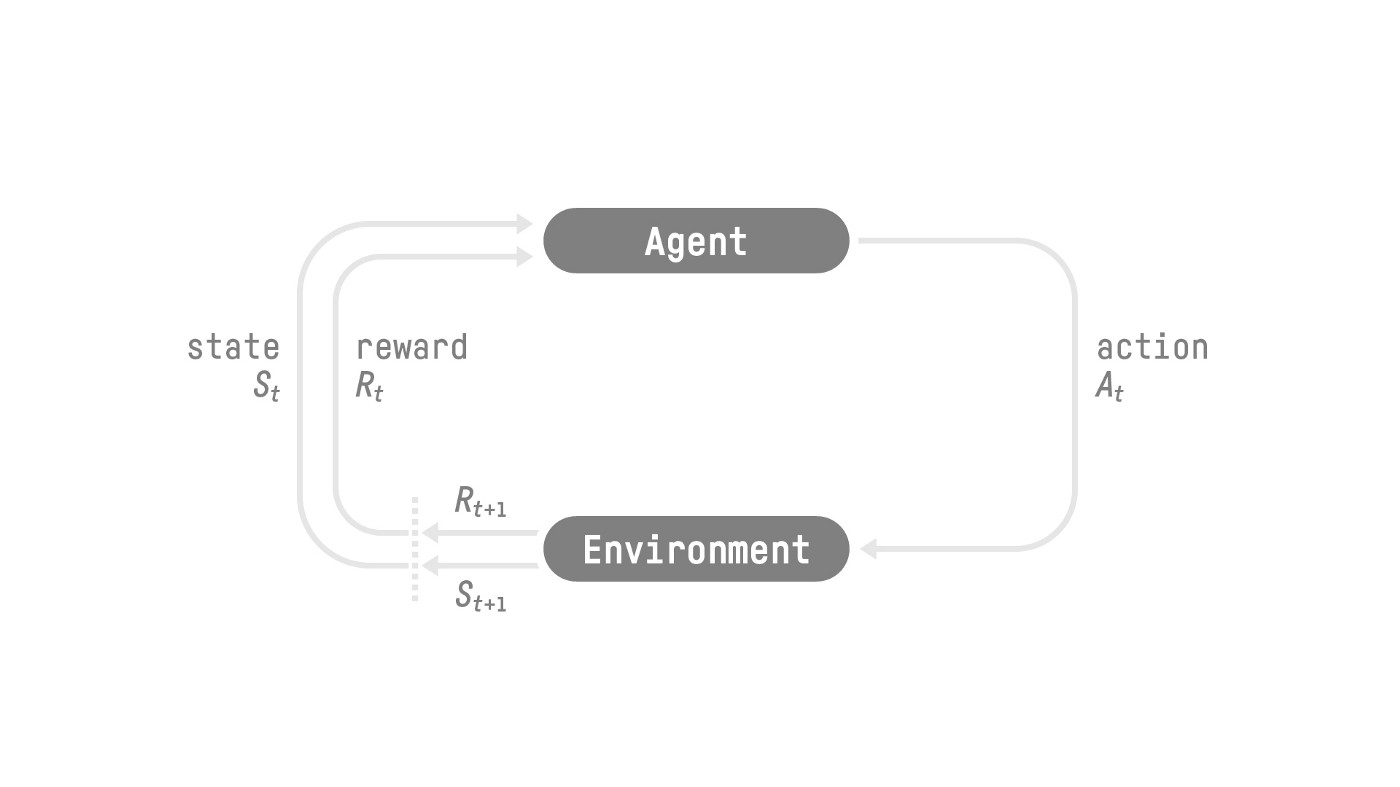

<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


✨🍰✨ Everything looks OK!
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-9bi28m47
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-9bi28m47
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 17a1fc057dcb6dac9641abf0987e5890ab70700c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-2udmh12z/elegantrl_e78ed2a02d9d443189e91f36253c11e1
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-2udmh12z/elegantrl_e78ed2a02d9d443189e91f36253c11e1
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit dde7ee4daa226450a43280e4ee02f1f23b565aa2
  Preparing metadata (setup.py) ... done



<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")


**Code revision**

```python
import pandas as pd
```
- `import pandas as pd`: This imports the Pandas library and assigns it an alias 'pd' to make it easier to reference in the code. Pandas is a powerful library used for data manipulation and analysis in Python, offering data structures like DataFrames and tools for handling structured data.

```python
import numpy as np
```
- `import numpy as np`: This imports the NumPy library and assigns it an alias 'np'. NumPy is a fundamental package for scientific computing in Python, providing support for multi-dimensional arrays, mathematical functions, linear algebra, random number capabilities, etc.

```python
import matplotlib
import matplotlib.pyplot as plt
```
- `import matplotlib` and `import matplotlib.pyplot as plt`: These lines import Matplotlib, a popular plotting library in Python, and specifically the 'pyplot' module, which provides a MATLAB-like plotting interface. The second line imports 'pyplot' and assigns it the alias 'plt', which is commonly used as a shorthand for plotting commands.

```python
import datetime
```
- `import datetime`: This line imports the 'datetime' module, which provides classes to manipulate dates and times in Python.

```python
%matplotlib inline
```
- `%matplotlib inline`: This is a magic command used in Jupyter notebooks or JupyterLab to display Matplotlib plots directly within the notebook interface. It allows Matplotlib plots to be displayed automatically without using the `plt.show()` function.

```python
from finrl.config_tickers import DOW_30_TICKER
```
- `from finrl.config_tickers import DOW_30_TICKER`: This line imports the 'DOW_30_TICKER' constant from the 'finrl.config_tickers' module. This constant likely contains a list of ticker symbols representing the Dow Jones Industrial Average (Dow 30).

```python
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
```
- These lines import specific classes or functions from various modules within the FinRL library. For instance, 'YahooDownloader' from 'finrl.meta.preprocessor.yahoodownloader' is used for downloading financial data from Yahoo Finance. 'FeatureEngineer' and 'data_split' are likely functions or classes for preprocessing data, and 'StockTradingEnv' is probably an environment for stock trading simulations.

```python
from finrl.agents.stablebaselines3.models import DRLAgent, DRLEnsembleAgent
```
- This line imports 'DRLAgent' and 'DRLEnsembleAgent' from the 'finrl.agents.stablebaselines3.models' module. These might be classes or agents used for reinforcement learning in the context of stock trading.

```python
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
```
- This line imports specific functions related to plotting and backtesting from the 'finrl.plot' module. These functions might be used for visualizing backtest results, calculating daily returns, or obtaining baseline data.

```python
from pprint import pprint
```
- `from pprint import pprint`: This line imports the 'pprint' function from the 'pprint' module. 'pprint' stands for 'pretty-print' and is used to print data structures in a more human-readable format.

```python
import sys
sys.path.append("../FinRL-Library")
```
- `import sys` and `sys.path.append("../FinRL-Library")`: These lines import the 'sys' module and then modify the 'sys.path' list to include the directory '../FinRL-Library'. This approach allows the code to access modules or packages located in the specified directory.

```python
import itertools
```
- `import itertools`: This line imports the 'itertools' module, which provides various functions to work with iterators and combinatorial functions like permutations, combinations, etc.

These import statements bring in various libraries, functions, and classes necessary for working with financial data, reinforcement learning, plotting, and data preprocessing within the context of the FinRL library.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

<a id='1.4'></a>
## 2.4. Create Folders

Let's break down each line of the code:

```python
import os
```
- `import os`: This line imports the 'os' module, which provides functions for interacting with the operating system. It allows Python code to perform various operating system-related tasks such as file operations, directory manipulations, environment variables, etc.

```python
from finrl.main import check_and_make_directories
```
- `from finrl.main import check_and_make_directories`: This line imports the 'check_and_make_directories' function from the 'finrl.main' module. This function is likely responsible for checking the existence of directories and creating them if they don't exist.

```python
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
```
- This line imports specific constants or variables from the 'finrl.config' module. These constants might include directory paths (such as 'DATA_SAVE_DIR', 'TRAINED_MODEL_DIR', 'TENSORBOARD_LOG_DIR', 'RESULTS_DIR') and date-related configurations (like 'TRAIN_START_DATE', 'TRAIN_END_DATE', 'TEST_START_DATE', 'TEST_END_DATE', 'TRADE_START_DATE', 'TRADE_END_DATE'). These values could be used as configurations or parameters within the code.

```python
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])
```
- `check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])`: This line calls the 'check_and_make_directories' function, passing a list of directory paths as an argument. This function, as mentioned earlier, is likely responsible for creating these directories if they don't exist in the file system. The directories are specified by the variables/constants imported from 'finrl.config'.

In [ ]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [ ]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.478998,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.300194,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777546,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.523609,7325600,CAT,0


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
97008,2023-02-28,482.670013,483.359985,473.920013,470.480438,3902100,UNH,1
97009,2023-02-28,220.000000,221.770004,219.500000,218.634583,5385400,V,1
97010,2023-02-28,38.700001,38.970001,38.549999,36.722885,16685300,VZ,1
97011,2023-02-28,35.480000,35.779999,35.320000,33.584301,8847000,WBA,1
97012,2023-02-28,141.000000,142.649994,140.949997,140.514633,6018000,WMT,1


In [ ]:
df.shape

(97013, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.478998,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.300194,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777546,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.523609,7325600,CAT,0


In [ ]:
len(df.tic.unique())

30

In [ ]:
df.tic.value_counts()

tic
AAPL    3311
AMGN    3311
WMT     3311
WBA     3311
VZ      3311
V       3311
UNH     3311
TRV     3311
PG      3311
NKE     3311
MSFT    3311
MRK     3311
MMM     3311
MCD     3311
KO      3311
JPM     3311
JNJ     3311
INTC    3311
IBM     3311
HON     3311
HD      3311
GS      3311
DIS     3311
CVX     3311
CSCO    3311
CRM     3311
CAT     3311
BA      3311
AXP     3311
DOW      994
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.


Brief overview of each indicator and how it works mathematically:

1. **Moving Average Convergence Divergence (MACD):**
   - MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.
   - It's calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.
   - The MACD line is often accompanied by a signal line, which is a 9-period EMA of the MACD line.
   - Formula:
     - MACD Line = 12-period EMA - 26-period EMA
     - Signal Line = 9-period EMA of MACD Line

2. **Relative Strength Index (RSI):**
   - RSI is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock or asset.
   - It's calculated using the average gain and average loss during a specific time period, usually 14 periods.
   - Formula:
     - Relative Strength (RS) = Average Gain / Average Loss over 'n' periods
     - RSI = 100 - (100 / (1 + RS))

3. **Commodity Channel Index (CCI):**
   - CCI measures the relationship between the asset's price, a moving average of the price, and normal deviations from that average.
   - It's calculated by taking the difference between the asset's typical price and a simple moving average (SMA) of the typical price, divided by the mean absolute deviation.
   - Formula:
     - Typical Price = (High + Low + Close) / 3
     - CCI = (Typical Price - n-period SMA of Typical Price) / (0.015 * Mean Deviation)

4. **Directional Movement Index (DX):**
   - DX is used to determine the strength of a prevailing trend, whether it's an upward or downward trend.
   - It's calculated using the Positive Directional Movement (+DI), Negative Directional Movement (-DI), and Average True Range (ATR).
   - Formula:
     - +DI = 100 times EMA of positive price moves divided by the Average True Range
     - -DI = 100 times EMA of negative price moves divided by the Average True Range
     - DX = 100 times the absolute value of (+DI - (-DI)) divided by (+DI + (-DI))

These formulas give a high-level understanding of how these indicators are computed. However, keep in mind that these indicators often use additional smoothing or scaling factors to adapt to different market conditions and asset types. Interpretation of these indicators involves analyzing their levels, crossovers, and divergences to make informed trading decisions.

In [ ]:
  INDICATORS = ['macd',
                'rsi_30',
                'cci_30',
                'dx_30']

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
54329,2017-06-13,148.604202,148.642441,147.370941,108.308075,3685581,IBM,1,-0.637108,42.499434,73.296208,23.938752,18.874290
20681,2012-11-01,85.220001,87.860001,85.000000,64.725571,8550000,CAT,3,-0.244107,52.838774,28.415862,16.691752,52.522882
3670,2010-07-06,25.295000,25.340000,25.010000,16.760138,18338200,KO,1,-0.151146,43.982932,-97.946022,34.333102,0.000000
44957,2016-03-02,85.400002,87.180000,84.400002,63.447567,9637600,CVX,2,0.367539,52.111926,84.007830,14.787078,18.107178
77495,2020-08-14,89.000000,90.589996,88.849998,78.271568,6343000,CVX,4,0.195644,51.308514,67.461803,12.162487,6.348681


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.



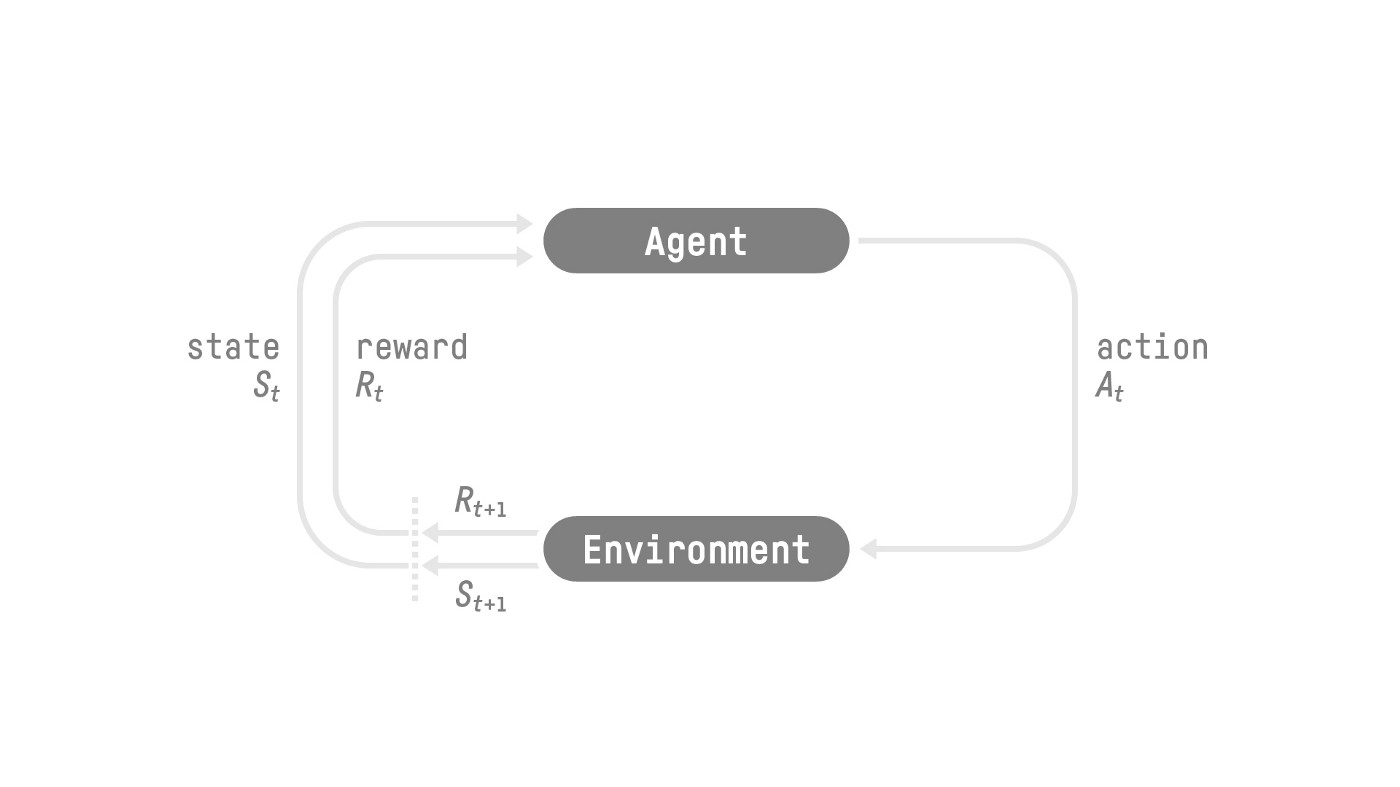

An explanation of each line with respect to designing the environment:

1. **`stock_dimension = len(processed.tic.unique())`:**
   - This line calculates the number of unique stocks or tickers in the processed dataset.
   - `processed.tic.unique()` retrieves the unique ticker symbols ('tic') from the preprocessed data.
   - `len(processed.tic.unique())` returns the count of unique tickers, which represents the number of different stocks in the dataset.

2. **`state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension`:**
   - `state_space` defines the total number of elements or dimensions in the state space of the reinforcement learning environment.
   - `1` represents the amount of cash or capital available to the agent in the environment.
   - `2 * stock_dimension` accounts for the holdings of each stock, considering both the number of shares and the cash invested in each stock.
   - `len(INDICATORS) * stock_dimension` signifies the dimensions added by the technical indicators for each stock. It's the total number of dimensions added by the technical indicators for each stock ticker.
   - Finally, all these components are summed up to define the overall state space for the reinforcement learning environment.

This calculation of `state_space` is essential for defining the state representation that the RL agent will observe and interact with in the trading environment. It considers the cash, stock holdings, and additional dimensions introduced by the technical indicators, providing the agent with a comprehensive view of the environment it operates within.

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 175


**Env_kwargs**

**Basic Concept:**
In the context of developing an automated stock trading environment, `env_kwargs` contains various parameters that configure how the trading environment operates. It's important to set these parameters to ensure that the trading simulation matches real-world conditions as closely as possible.

**Advanced Concept:**
Let's go through each parameter:

1. `"hmax": 100`
   - **Basic Concept:** This parameter defines the maximum number of steps (days) that an episode (a simulated trading period) can last. The environment will reset after this many steps.
   - **Advanced Concept:** In real-world trading, you may want to limit the trading period for various reasons, such as avoiding long-term positions. Setting `hmax` to 100 means that each episode lasts for 100 trading days.

2. `"initial_amount": 1000000`
   - **Basic Concept:** This parameter specifies the initial capital that the trading agent starts with at the beginning of each episode.
   - **Advanced Concept:** The agent needs an initial capital to buy and sell assets. In this case, the agent starts with $1,000,000.

3. `"buy_cost_pct": 0.001`
   - **Basic Concept:** This parameter defines the percentage cost incurred when buying assets. A value of 0.001 represents a 0.1% cost.
   - **Advanced Concept:** In real-world trading, there are costs associated with buying and selling assets, such as brokerage fees and slippage. A cost of 0.1% is a common approximation of these fees.

4. `"sell_cost_pct": 0.001`
   - **Basic Concept:** Similar to `"buy_cost_pct"`, this parameter defines the percentage cost incurred when selling assets.
   - **Advanced Concept:** Selling assets also comes with costs, and this parameter represents the cost percentage associated with selling. Again, 0.1% is used as an example.

5. `"state_space": state_space`
   - **Basic Concept:** This parameter sets the size of the state space for the trading environment. It should match the value calculated for `state_space`.
   - **Advanced Concept:** The state space is a crucial part of the environment and must be consistent with the agent's expectations. It should represent the information the agent uses to make decisions.

6. `"stock_dim": stock_dimension`
   - **Basic Concept:** This parameter specifies the number of unique stocks available for trading. It should match the value calculated for `stock_dimension`.
   - **Advanced Concept:** The number of unique stocks affects the trading universe. In this case, there are 29 unique stocks.

7. `"tech_indicator_list": INDICATORS`
   - **Basic Concept:** This parameter defines the list of technical indicators used in the environment. It should match the list of technical indicators defined earlier.
   - **Advanced Concept:** The choice of technical indicators significantly impacts the trading strategy. `INDICATORS` is a predefined list, including indicators like MACD, RSI, CCI, and DX.

8. `"action_space": stock_dimension`
   - **Basic Concept:** This parameter specifies the size of the action space, which should match the value calculated for `stock_dimension`.
   - **Advanced Concept:** The action space defines the possible actions the agent can take, such as buying or selling shares. The size depends on the number of unique stocks (29 in this case).

9. `"reward_scaling": 1e-4`
   - **Basic Concept:** This parameter scales the reward signal provided to the agent during training. It's often used to control the magnitude of rewards and gradients.
   - **Advanced Concept:** Scaling the reward can help stabilize the training process. A smaller value like 1e-4 means that rewards are scaled down by a factor of 0.0001.

10. `"print_verbosity": 5`
    - **Basic Concept:** This parameter controls the verbosity of print statements in the environment. A higher value results in more print statements.
    - **Advanced Concept:** During training, it's helpful to have some level of print output for debugging and monitoring the agent's behavior. Setting `print_verbosity` to 5 results in more detailed print statements.

Overall, `env_kwargs` configures the trading environment to match the desired characteristics and conditions for training a trading agent. The parameters ensure that the environment provides the necessary information and operates according to realistic trading principles.

In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  201.71773773283394
======Model training from:  2010-01-01 to  2021-10-04
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1
--------------------------------------
| time/                 |            |
|    fps                | 44         |
|    iterations         | 100        |
|    time_elapsed       | 11         |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -41.5      |
|    explained_variance | -1.19e-07  |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -75.1      |
|    reward             | 0.22254334 |
|    std                | 1.01       |
|    value_loss         | 4.46       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps   

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2021-10-04,2022-01-03,PPO,-0.162629,0.142203,0.086903
1,189,2022-01-03,2022-04-04,DDPG,-0.157657,-0.182129,-0.095538
2,252,2022-04-04,2022-07-06,DDPG,-0.202959,-0.289828,-0.191299
3,315,2022-07-06,2022-10-04,DDPG,-0.210986,-0.14359,-0.076761


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate': unique_trade_date})

# Create an empty list to hold DataFrames
df_account_value_list = []

for i in range(rebalance_window + validation_window, len(unique_trade_date) + 1, rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble', i))
    df_account_value_list.append(temp)

# Concatenate all DataFrames in df_account_value_list
df_account_value = pd.concat(df_account_value_list, ignore_index=True)

# Calculate Sharpe Ratio
sharpe = (252 ** 0.5) * (df_account_value.account_value.pct_change(1).mean() / df_account_value.account_value.pct_change(1).std())
print('Sharpe Ratio:', sharpe)

# Join data with df_trade_date
df_account_value = df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))


Sharpe Ratio: -0.17830382906722497


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2022-01-03,NaN,2022-01-03
1,1.000324e+06,2022-01-04,0.000324,2022-01-04
2,9.924766e+05,2022-01-05,-0.007845,2022-01-05
3,9.920283e+05,2022-01-06,-0.000452,2022-01-06
4,9.924334e+05,2022-01-07,0.000408,2022-01-07


<Axes: >

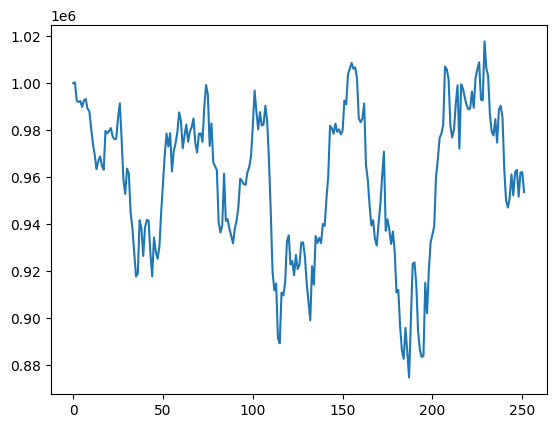

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.046338
Cumulative returns    -0.046338
Annual volatility      0.178348
Sharpe ratio          -0.178304
Calmar ratio          -0.348803
Stability              0.001054
Max drawdown          -0.132849
Omega ratio            0.970685
Sortino ratio         -0.255376
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.176382
Daily value at risk   -0.022596
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (251, 8)
Annual return         -0.094324
Cumulative returns    -0.093968
Annual volatility      0.198502
Sharpe ratio          -0.402058
Calmar ratio          -0.429901
Stability              0.236972
Max drawdown          -0.219408
Omega ratio            0.936015
Sortino ratio         -0.559755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.014390
Daily value at risk   -0.025326
dtype: float64


In [ ]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')


df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.005866e+06
2    2022-01-05  9.951360e+05
3    2022-01-06  9.904718e+05
4    2022-01-07  9.903404e+05
..          ...           ...
247  2022-12-27  9.086102e+05
248  2022-12-28  8.986103e+05
249  2022-12-29  9.080428e+05
250  2022-12-30  9.060324e+05
251  2023-01-03           NaN

[252 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-01-05  9.951360e+05
2022-01-06  9.904718e+05
2022-01-07  9.903404e+05
...                  ...
2022-12-27  9.086102e+05
2022-12-28  8.986103e+05
2022-12-29  9.080428e+05
2022-12-30  9.060324e+05
2023-01-03           NaN

[252 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

In [ ]:
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)



df_result_ensemble.columns:  Index(['ensemble'], dtype='object')


In [ ]:
# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)


df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
348  2023-02-22
349  2023-02-23
350  2023-02-24
351  2023-02-27
352  2023-02-28

[353 rows x 1 columns]


In [ ]:
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)


df_result_ensemble:                  ensemble
date                    
2022-01-03  1.000000e+06
2022-01-04  1.000324e+06
2022-01-05  9.924766e+05
2022-01-06  9.920283e+05
2022-01-07  9.924334e+05
...                  ...
2022-12-27  9.631111e+05
2022-12-28  9.516929e+05
2022-12-29  9.619647e+05
2022-12-30  9.620829e+05
2023-01-03  9.536619e+05

[252 rows x 1 columns]


==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2022-01-03  1.000000e+06  1.000000e+06
2022-01-04  1.000324e+06  1.005866e+06
2022-01-05  9.924766e+05  9.951360e+05
2022-01-06  9.920283e+05  9.904718e+05
2022-01-07  9.924334e+05  9.903404e+05
...                  ...           ...
2022-12-27  9.631111e+05  9.086102e+05
2022-12-28  9.516929e+05  8.986103e+05
2022-12-29  9.619647e+05  9.080428e+05
2022-12-30  9.620829e+05  9.060324e+05
2023-01-03  9.536619e+05           NaN

[252 rows x 2 columns]


<Figure size 1500x500 with 0 Axes>

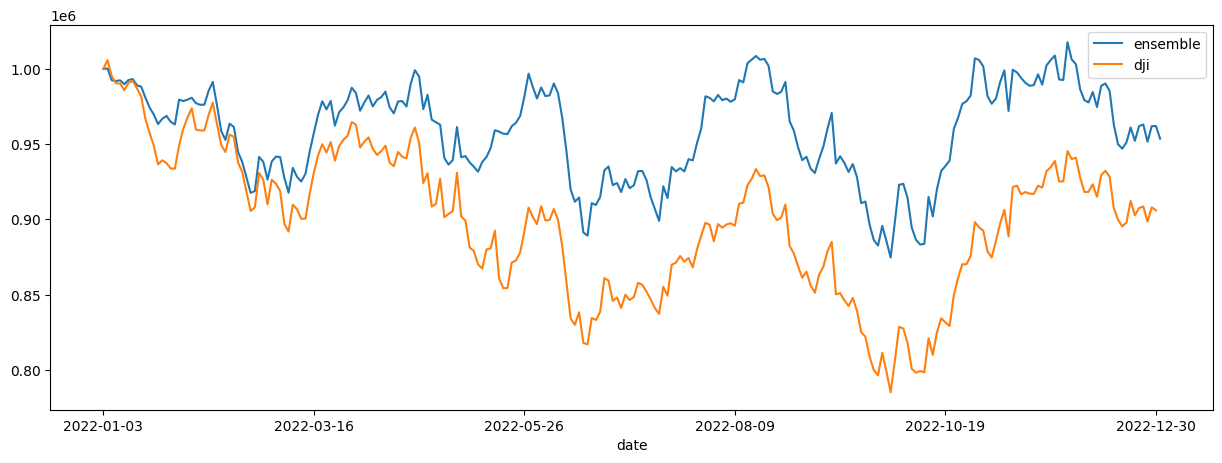

In [ ]:
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [ ]:
!pip install alpaca-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 10.4
    Uninstalling websockets-10.4:
      Successfully uninstalled websockets-10.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alpaca-trade-api 3.0.2 requires websockets<11,>=9.0, but you have websockets 11.0.3 which is incompatible.


In [ ]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as datetime
from alpaca.data.live import StockDataStream
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.requests import LimitOrderRequest


# # paper=True enables paper trading
trading_client = TradingClient('PKWXKEWSIWDM0W6R560Z', 'ihAmr3XMPRsyMzh8PJf4TP9rO7xZK0xYwjrRVCg3', paper=True)


##Market Order
# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="SPY",
                    qty=2,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.DAY
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )